## Import needed modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [3]:
# read dataset using pandas
dataset = pd.read_csv('Position_Salaries.csv')

dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [11]:
# make x,y as features
x = dataset.iloc[: ,1:2].values
y = dataset.iloc[: ,2].values

In [12]:
def define_model(degree):
    
    # create an object of class PolynomialFeatures
    poly_reg = PolynomialFeatures(degree)
    
    # call fit transform on x variables
    x_poly = poly_reg.fit_transform(x)
    
    # fit the transformed x to the y
    poly_reg.fit(x_poly, y)
    
    # create an object of class LinearRegression
    lin_reg = LinearRegression()
    
    # fit the model to transformed x
    lin_reg.fit(x_poly, y)
    
    return lin_reg, poly_reg

# call the function with the desired degree
lin_reg, poly_reg = define_model(4)

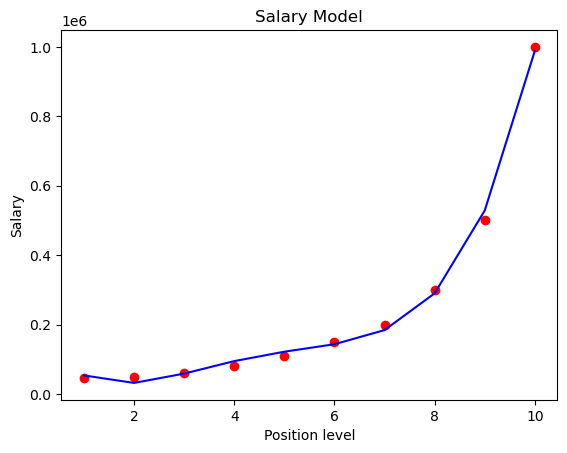

In [13]:
def show_regression(lin_reg, poly_reg):
    plt.scatter(x, y, color = 'red')
    plt.plot(x, lin_reg.predict(poly_reg.fit_transform(x)), color = 'blue')
    plt.title('Salary Model')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
 
show_regression(lin_reg, poly_reg)

In [16]:
# predict a new result using Polynomial Regression 
salary = int(lin_reg.predict(poly_reg.fit_transform([[7.5]])))
print('Estimated Salary: $', salary)

Estimated Salary: $ 225126
